##  Statistical Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# from google.colab import files
# uploaded=files.upload()
# import io

Saving gene_data.csv to gene_data (9).csv


In [2]:
# data=pd.read_csv(io.StringIO(uploaded['gene_data.csv'].decode('utf-8')),header=None, sep='\t')
# data.head()
data=pd.read_csv('gene_data.csv', header=None, sep='\t')
data.head()

,0,1,2,3,4,5
0,0.0,1.050778,0.565836,0.970966,0.564797,0.482205
1,0.1,0.927415,0.314328,0.926647,0.644547,0.622073
2,0.2,0.920302,0.322418,0.912583,0.807286,0.680840
3,0.3,0.780651,0.456490,0.868284,0.882913,0.877914
4,0.4,0.804124,0.586241,0.915385,0.955537,0.921647


In [3]:
data.columns= [ 'time', 'x1', 'x2', 'x3','x4','x5']
data.head(2)

,time,x1,x2,x3,x4,x5
0,0.0,1.050778,0.565836,0.970966,0.564797,0.482205
1,0.1,0.927415,0.314328,0.926647,0.644547,0.622073


In [4]:
print(data.shape)
print(data.isnull().sum())

(301, 6)
time    0
x1      0
x2      0
x3      0
x4      0
x5      0
dtype: int64


**Task 1: Preliminary data analysis**

You should first perform an initial exploratory data analysis, by investigating:

• Time series plots (of each gene against sampling time)

• Distribution for each gene (time-series)

• Correlation and scatter plots (between different combination of two genes) to examine their
dependencies

In [5]:
data1= data.copy()
data1.head(2)

,time,x1,x2,x3,x4,x5
0,0.0,1.050778,0.565836,0.970966,0.564797,0.482205
1,0.1,0.927415,0.314328,0.926647,0.644547,0.622073


In [6]:
data1.set_index(data1['time'], inplace=True) 

In [7]:
data1.head(2)

,time,x1,x2,x3,x4,x5
time,,,,,,
0.0,0.0,1.050778,0.565836,0.970966,0.564797,0.482205
0.1,0.1,0.927415,0.314328,0.926647,0.644547,0.622073


In [8]:
data1.describe()

,time,x1,x2,x3,x4,x5
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,15.000000,1.408540,1.523716,1.447331,1.410121,1.595587
std,8.703543,0.350848,0.563047,0.439728,0.290399,0.335002
min,0.000000,0.681297,0.314328,0.569043,0.564797,0.482205
25%,7.500000,1.075980,0.994929,1.036931,1.156419,1.301543
50%,15.000000,1.424517,1.586479,1.446317,1.424729,1.617133
75%,22.500000,1.756039,2.041698,1.880349,1.683586,1.912497
max,30.000000,2.011843,2.540164,2.173947,1.946802,2.190523


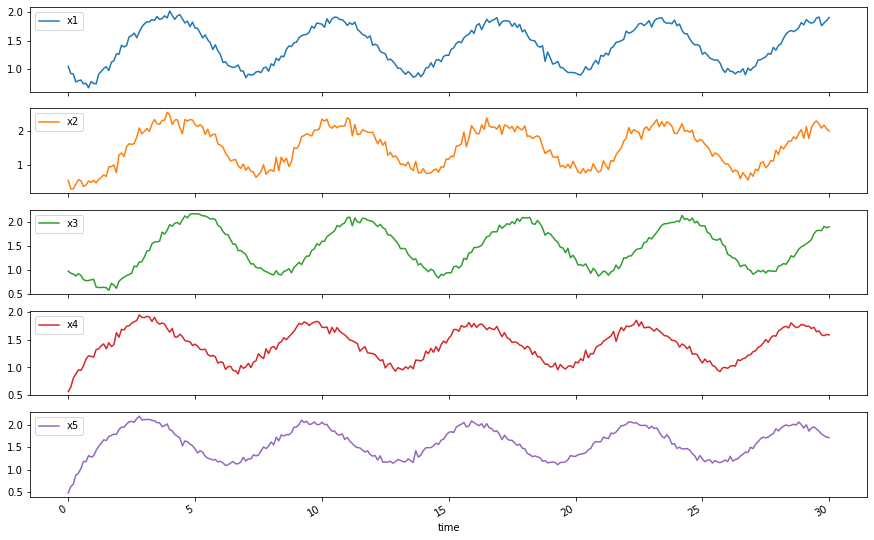

In [9]:
#Time series plots (of each gene against sampling time)
data1.drop('time',axis=1).plot(subplots=True, figsize=(15,10))
plt.show()

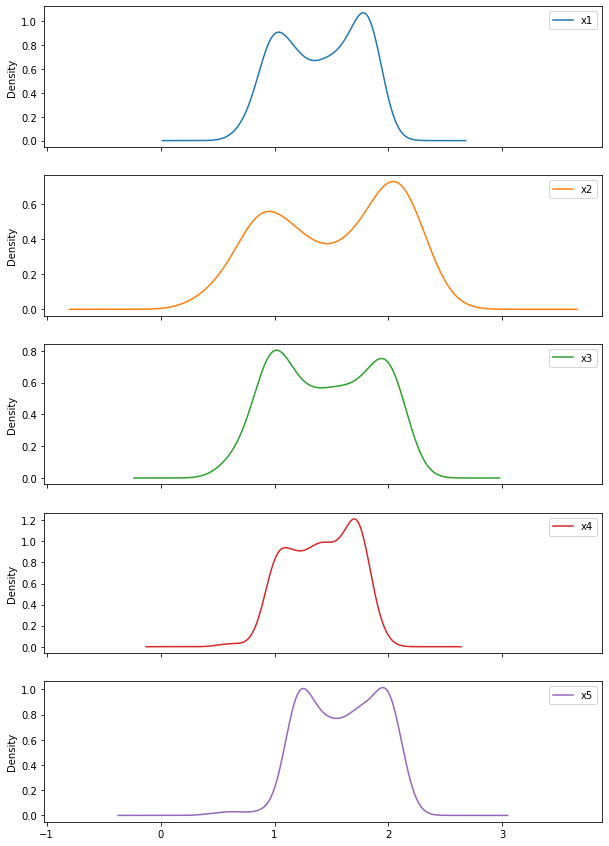

In [10]:
#Distribution for each gene (time-series)
data1.drop('time',axis=1).plot(subplots=True, kind='kde',figsize=(10,15))
plt.show()

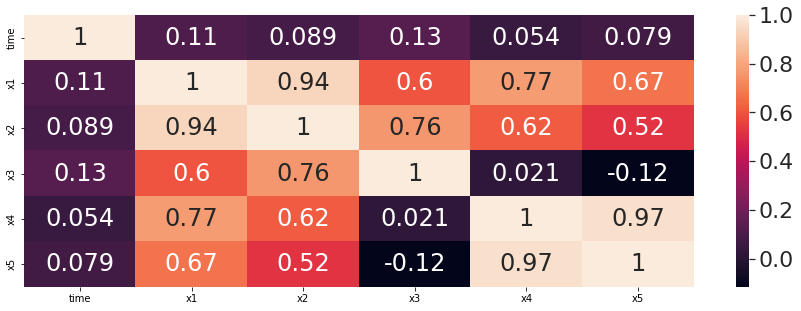

In [11]:
#Correlation and scatter plots (between different combination of two genes) to examine their dependencies

##Correlation plot
plt.subplots(figsize=(15,5))
sns.set(font_scale=2)
sns.heatmap(data1.corr(), annot=True)
plt.show()

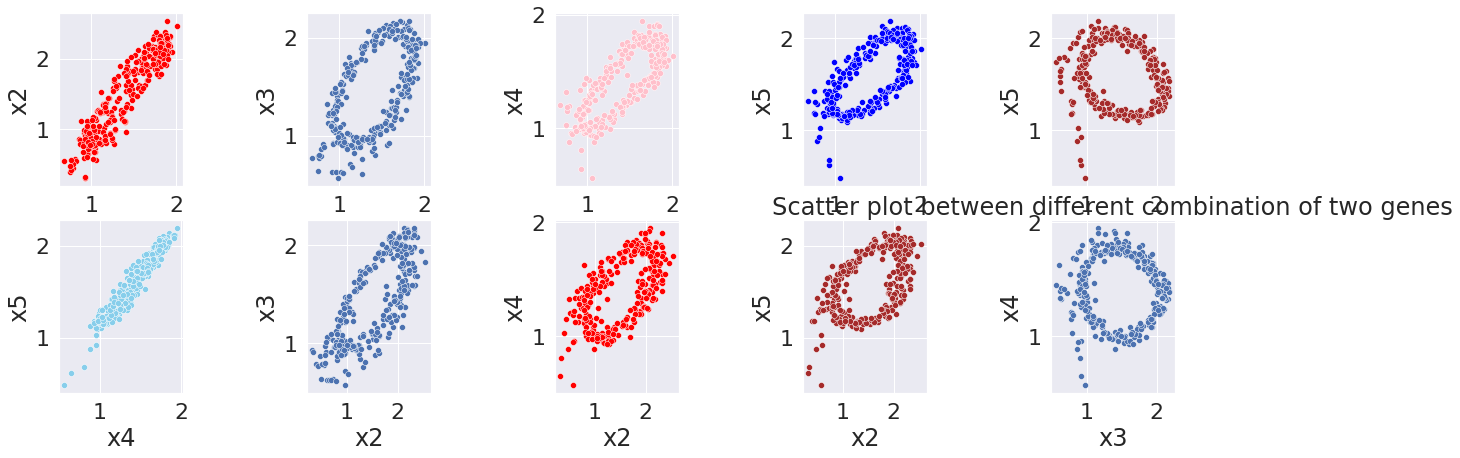

In [12]:
## Scatter plot
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (20, 7))
plt.title('Scatter plot between different combination of two genes')

sns.scatterplot(data1['x1'],data1['x2'],ax=axs[0,0],color='red')
sns.scatterplot(data1['x1'],data1['x3'],ax=axs[0,1])
sns.scatterplot(data1['x1'],data1['x4'],ax=axs[0,2],color='pink')
sns.scatterplot(data1['x1'],data1['x5'],ax=axs[0,3],color='blue')
sns.scatterplot(data1['x3'],data1['x5'],ax=axs[0,4],color='brown')

sns.scatterplot(data1['x4'],data1['x5'],ax=axs[1,0],color='skyblue')
sns.scatterplot(data1['x2'],data1['x3'],ax=axs[1,1])
sns.scatterplot(data1['x2'],data1['x4'],ax=axs[1,2],color='red')
sns.scatterplot(data1['x2'],data1['x5'],ax=axs[1,3],color='brown')

sns.scatterplot(data1['x3'],data1['x4'],ax=axs[1,4])


plt.title('Scatter plot between different combination of two genes')
plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

Task 2: Regression – modelling the relationship between gene expression
We would like to determine a suitable mathematical model in explaining the relationship between the
output gene 𝐲 = 𝐱2 with other input genes (i.e. 𝐱1, 𝐱3, 𝐱4, 𝐱5 ) that actually ‘regulate’ its expression, 
which we assume can be described by a polynomial regression model. Below are 5 candidate nonlinear 
polynomial regression models, and only one of them can ‘truly’ describe such a relationship. The
objective is to identify this ‘true’ model from those candidate models following Tasks 2.1 – 2.6.


Candidate models are with the following structures:

Model 1: 𝑦 = 𝜃1 𝑥4 + 𝜃2 𝑥3
2 + 𝜃𝑏𝑖𝑎𝑠

Model 2: 𝑦 = 𝜃1 𝑥4 + 𝜃2 𝑥3
2 + 𝜃3 𝑥5 + 𝜃𝑏𝑖𝑎𝑠

Model 3: 𝑦 = 𝜃1 𝑥3 + 𝜃2 𝑥4 + 𝜃3 𝑥5
3

Model 4: 𝑦 = 𝜃1 𝑥4 + 𝜃2 𝑥3
2 + 𝜃3 𝑥5
3 + 𝜃𝑏𝑖𝑎𝑠

Model 5: 𝑦 = 𝜃1 𝑥4 + 𝜃2 𝑥1
2 + 𝜃3 𝑥3
2 + 𝜃𝑏𝑖𝑎𝑠


Task 2.1:
Estimate model parameters 𝜽 = {𝜃1, 𝜃2, ⋯ , 𝜃𝑏𝑖𝑎𝑠}
𝑇

for every candidate model using Least Squares (𝜽̂ =
(𝐗
𝑇𝐗)
−1𝐗
𝑇𝐲), using the provided input and output gene datasets (use all the data for training).

Task 2.2: 
Based on the estimated model parameters, compute the model residual (error) sum of squared errors 
(RSS), for every candidate model.
𝑅𝑆𝑆 = ∑ (𝑦𝑖 − 𝐱𝑖𝜽̂)
2
𝑛
𝑖=1

Here 𝐱𝑖 denotes the 𝑖
𝑡ℎ
row (𝑖
𝑡ℎ data sample) in the input data matrix 𝐗, 𝜽̂ is a column vector.

Task 2.3:
Compute the log-likelihood function for every candidate model:
ln 𝑝(𝐷|𝜽̂) = −
𝑛
2
ln(2𝜋) −
𝑛
2
ln(𝜎̂
2
) −
1
2𝜎̂
2
RSS

Here, 𝜎̂
2
is the variance of a model’s residuals (prediction errors) distributions 𝜎̂
2 = RSS/(𝑛 − 1) , with 
𝑛 the number of data samples. 𝐷 denotes the input-output dataset {𝐗, 𝐲}.

Task 2.4:
Compute the Akaike information criterion (AIC) and Bayesian information criterion (BIC) for every 
candidate model:
𝐴𝐼𝐶 = 2𝑘 − 2 ln 𝑝(𝐷|𝜽̂)

𝐵𝐼𝐶 = 𝑘 ∙ ln (𝑛) − 2 ln 𝑝(𝐷|𝜽̂)

Here ln 𝑝(𝐷|𝜽̂) is the log-likelihood function obtained from Task 2.3 for each model, 𝑘 is the number of 
estimated parameters in each candidate model.

**Task 2.1**

In [13]:
import statsmodels.formula.api as smf
model1= smf.ols('time ~ x4+ np.square(x3)', data=data).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.667
Date:                Mon, 25 Oct 2021   Prob (F-statistic):              0.191
Time:                        11:17:17   Log-Likelihood:                -1076.2
No. Observations:                 301   AIC:                             2158.
Df Residuals:                     298   BIC:                             2170.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.3492      2.633      4.310      0.000       6.167      16.532
x4                1.5947      1.727      0.924      0.356      -1.803       4.993
np.square(x3)     0.6129      0.392      1.565      0.119      -0.158       1.384
==============================================================================
Omnibus:                      221.349   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.524
Skew:                           0.035   Prob(JB):                     5.76e-05
Kurtosis:                       1.754   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model2= smf.ols('time ~ x4+ np.square(x3)+x5', data=data).fit()

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.913
Date:                Mon, 25 Oct 2021   Prob (F-statistic):            0.00240
Time:                        11:17:17   Log-Likelihood:                -1070.6
No. Observations:                 301   AIC:                             2149.
Df Residuals:                     297   BIC:                             2164.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.8400      2.695      3.281      0.001       3.537      14.143
x4              -24.5754      7.972     -3.083      0.002     -40.264      -8.887
np.square(x3)     1.4997      0.467      3.213      0.001       0.581       2.418
x5               23.4295      6.973      3.360      0.001       9.706      37.153
==============================================================================
Omnibus:                      152.674   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.068
Skew:                           0.080   Prob(JB):                     0.000119
Kurtosis:                       1.811   Cond. No.                         73.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model2.cov_params()

,Intercept,x4,np.square(x3),x5
Intercept,7.261084,1.769022,-0.526391,-5.207689
x4,1.769022,63.549482,-2.062583,-54.314436
np.square(x3),-0.526391,-2.062583,0.217880,1.840380
x5,-5.207689,-54.314436,1.840380,48.626507


In [18]:
model3= smf.ols('time ~ x3+x4+ I(x5**3.0)', data=data).fit()

In [19]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.108
Date:                Mon, 25 Oct 2021   Prob (F-statistic):             0.0993
Time:                        11:17:17   Log-Likelihood:                -1074.7
No. Observations:                 301   AIC:                             2157.
Df Residuals:                     297   BIC:                             2172.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.0460      5.187      1.744      0.082      -1.162      19.254
x3               2.6576      1.321      2.011      0.045       0.057       5.258
x4               1.4676      6.294      0.233      0.816     -10.919      13.854
I(x5 ** 3.0)     0.0083      0.718      0.012      0.991      -1.404       1.420
==============================================================================
Omnibus:                      219.232   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.609
Skew:                           0.062   Prob(JB):                     5.52e-05
Kurtosis:                       1.756   Cond. No.                         91.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model4= smf.ols('time ~ x4+I(x3**2.0)+ I(x5**3.0)', data=data).fit()

In [21]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.147
Date:                Mon, 25 Oct 2021   Prob (F-statistic):              0.330
Time:                        11:17:17   Log-Likelihood:                -1076.1
No. Observations:                 301   AIC:                             2160.
Df Residuals:                     297   BIC:                             2175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.6809      5.550      1.744      0.082      -1.241      20.603
x4               3.7688      6.595      0.572      0.568      -9.209      16.747
I(x3 ** 2.0)     0.5198      0.478      1.088      0.277      -0.420       1.460
I(x5 ** 3.0)    -0.2581      0.755     -0.342      0.733      -1.745       1.229
==============================================================================
Omnibus:                      218.337   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.462
Skew:                           0.034   Prob(JB):                     5.94e-05
Kurtosis:                       1.756   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model5= smf.ols('time ~ x4+I(x1**2.0)+ I(x3**2.0)', data=data).fit()

In [23]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.116
Date:                Mon, 25 Oct 2021   Prob (F-statistic):              0.343
Time:                        11:17:17   Log-Likelihood:                -1076.2
No. Observations:                 301   AIC:                             2160.
Df Residuals:                     297   BIC:                             2175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.6192      5.340      1.989      0.048       0.111      21.128
x4               2.3379      5.033      0.464      0.643      -7.567      12.243
I(x1 ** 2.0)    -0.2905      1.848     -0.157      0.875      -3.927       3.346
I(x3 ** 2.0)     0.7415      0.907      0.818      0.414      -1.043       2.526
==============================================================================
Omnibus:                      222.321   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.557
Skew:                           0.039   Prob(JB):                     5.67e-05
Kurtosis:                       1.754   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print('Estimated parameters of model1 \n',model1.params)
print('\n')
print('Estimated parameters of model2 \n',model2.params)
print('\n')
print('Estimated parameters of model3 \n',model3.params)
print('\n')
print('Estimated parameters of model4 \n',model4.params)
print('\n')
print('Estimated parameters of model5 \n',model5.params)

Estimated parameters of model1 
 Intercept        11.349158
x4                1.594710
np.square(x3)     0.612947
dtype: float64


Estimated parameters of model2 
 Intercept         8.839955
x4              -24.575429
np.square(x3)     1.499691
x5               23.429543
dtype: float64


Estimated parameters of model3 
 Intercept       9.045972
x3              2.657624
x4              1.467639
I(x5 ** 3.0)    0.008285
dtype: float64


Estimated parameters of model4 
 Intercept       9.680892
x4              3.768793
I(x3 ** 2.0)    0.519813
I(x5 ** 3.0)   -0.258102
dtype: float64


Estimated parameters of model5 
 Intercept       10.619207
x4               2.337869
I(x1 ** 2.0)    -0.290515
I(x3 ** 2.0)     0.741484
dtype: float64


In [25]:
# Task 2.2: Residual sum of square is also known as explained sum of square

print('Residual sum of square for model1: ',round(model1.ess,4))
print('Residual sum of square for model2: ',round(model2.ess,4))
print('Residual sum of square for model3: ',round(model3.ess,4))
print('Residual sum of square for model4: ',round(model4.ess,4))
print('Residual sum of square for model5: ',round(model5.ess,4))

Residual sum of square for model1:  251.4469
Residual sum of square for model2:  1074.4055
Residual sum of square for model3:  473.8122
Residual sum of square for model4:  260.2752
Residual sum of square for model5:  253.3173


In [26]:
## Task 2.3: Log Likelihood of models
print('Log Likelihood value for model1: ',round(model1.llf,4))
print('Log Likelihood value for model2: ',round(model2.llf,4))
print('Log Likelihood value for model3: ',round(model3.llf,4))
print('Log Likelihood value for model4: ',round(model4.llf,4))
print('Log Likelihood value for model5: ',round(model5.llf,4))

Log Likelihood value for model1:  -1076.208
Log Likelihood value for model2:  -1070.5935
Log Likelihood value for model3:  -1074.7115
Log Likelihood value for model4:  -1076.1488
Log Likelihood value for model5:  -1076.1954


In [27]:
#Task 2.4: 𝐴𝐼𝐶 and BIC
print('AIC value for model1: ',round(model1.aic,4))
print('AIC value for model2: ',round(model2.aic,4))
print('AIC value for model3: ',round(model3.aic,4))
print('AIC value for model4: ',round(model4.aic,4))
print('AIC value for model5: ',round(model5.aic,4))

AIC value for model1:  2158.4159
AIC value for model2:  2149.187
AIC value for model3:  2157.4229
AIC value for model4:  2160.2977
AIC value for model5:  2160.3909


In [28]:
# BIC
print('BIC value for model1: ',round(model1.bic,4))
print('BIC value for model2: ',round(model2.bic,4))
print('BIC value for model3: ',round(model3.bic,4))
print('BIC value for model4: ',round(model4.bic,4))
print('BIC value for model5: ',round(model5.bic,4))

BIC value for model1:  2169.5373
BIC value for model2:  2164.0154
BIC value for model3:  2172.2514
BIC value for model4:  2175.1261
BIC value for model5:  2175.2193


Task 2.5:
Check the distribution of model prediction errors (residuals) for each candidate model. Plot the error 
distributions, and evaluate if those distributions are close to Normal/Gaussian (as the output gene has 
additive Gaussian noise), e.g. by using Q-Q plot.

Task 2.6:
Select ‘best’ regression model according to the AIC, BIC and distribution of model residuals from the 5 
candidate models, and explain why you would like to choose this specific model.


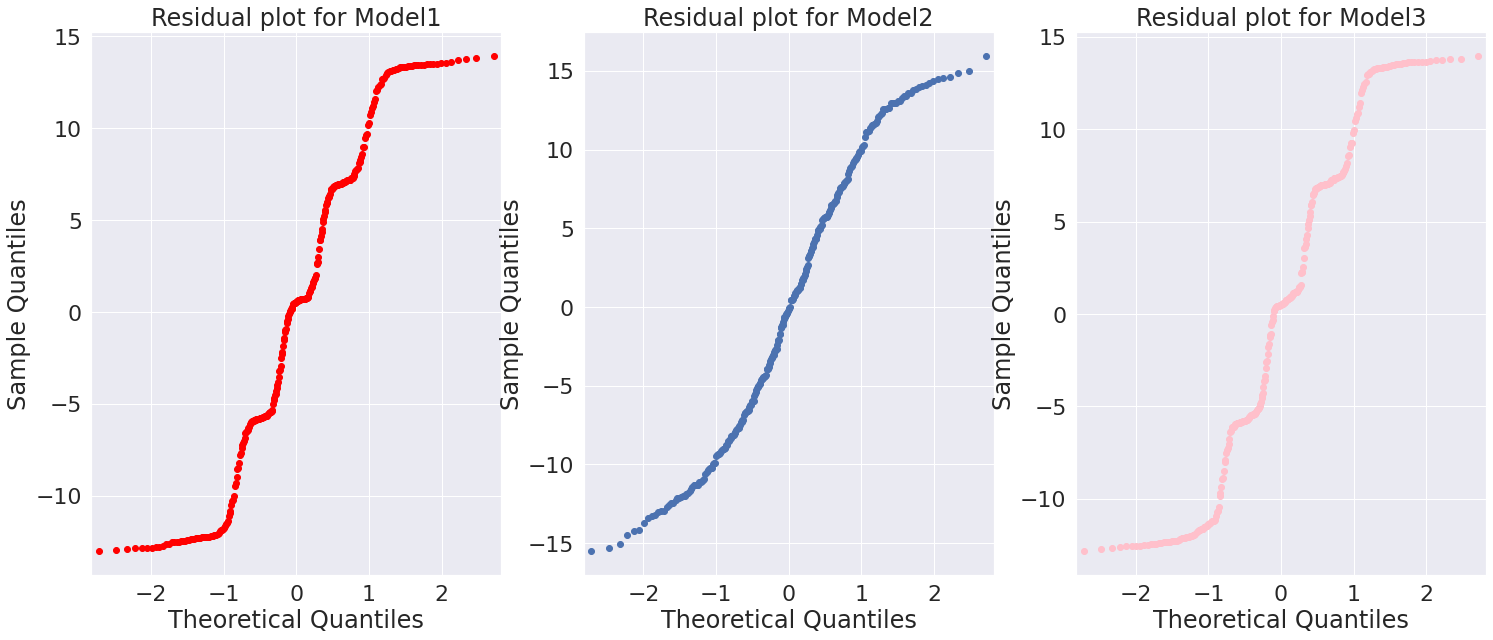

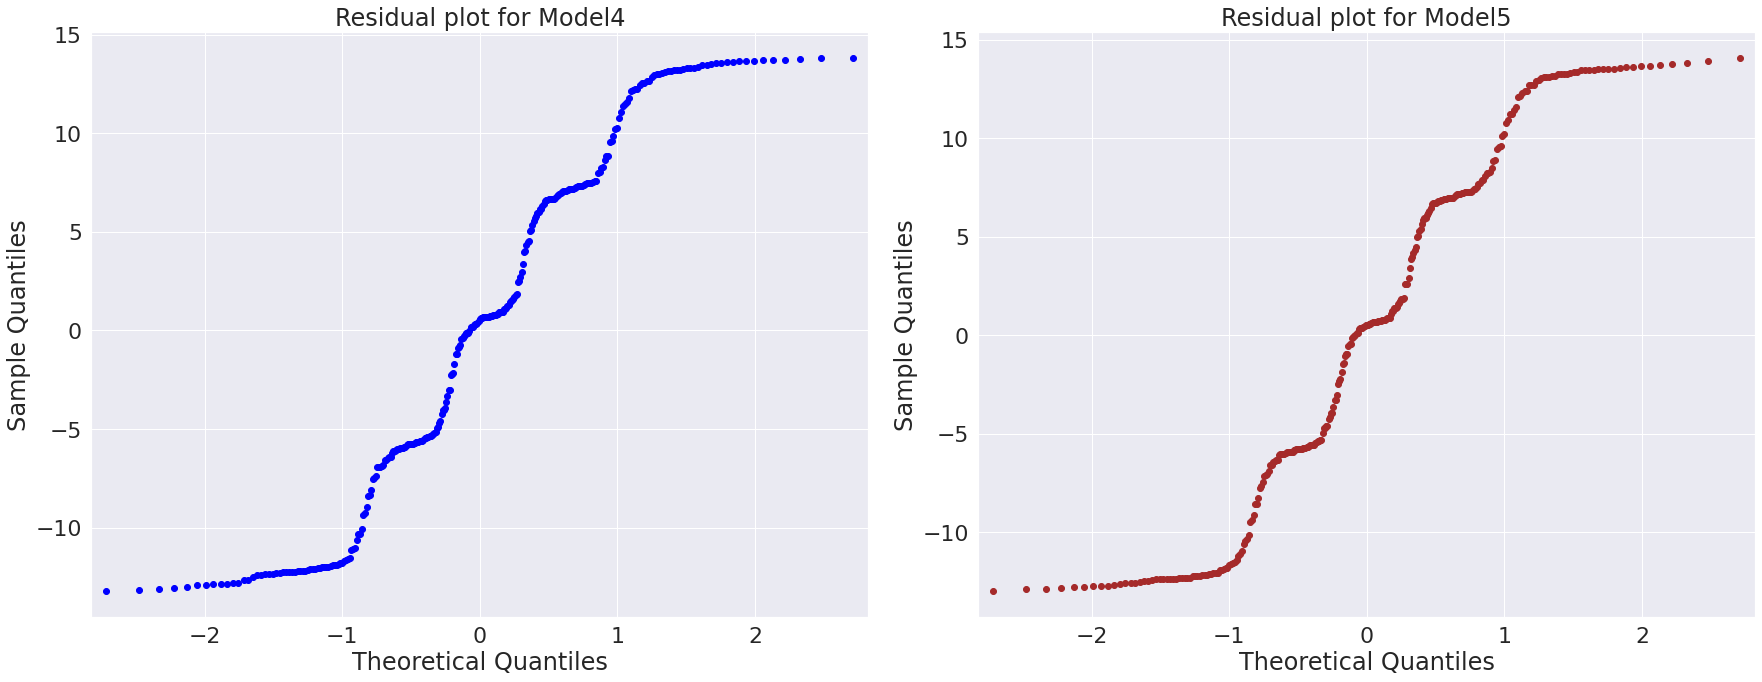

In [29]:
# Task 2.5: Residual plot by using QQplot.
import statsmodels.api as sm
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(25,10))

sm.qqplot(model1.resid ,ax=ax1,color='red')
ax1.set_title("Residual plot for Model1")

sm.qqplot(model2.resid ,ax=ax2)
ax2.set_title("Residual plot for Model2")

sm.qqplot(model3.resid ,ax=ax3,color='pink')
ax3.set_title("Residual plot for Model3")

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(25,10))

sm.qqplot(model4.resid ,ax=ax1,color='blue')
ax1.set_title("Residual plot for Model4")
sm.qqplot(model5.resid ,ax=ax2,color='brown')
ax2.set_title("Residual plot for Model5")


plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

- Model 2 is close to Normal/ Gaussian distribution, so model-2 is the best model.

Task 2.7:
Split the input and output gene dataset (𝐗 and 𝐲) into two parts: one part used to train the model, the 
other used for testing (e.g. 70% for training, 30% for testing). For the selected ‘best’ model, 1) estimate 
model parameters use the training dataset; 2) compute the model’s output/prediction on the testing 
data; and 3) also compute the 95% (model prediction) confidence intervals and plot them (with error 
bars) together with the model prediction, as well as the testing data samples.

In [30]:
data['X3_2']= data.iloc[:,3]**2
data.head()

,time,x1,x2,x3,x4,x5,X3_2
0,0.0,1.050778,0.565836,0.970966,0.564797,0.482205,0.942775
1,0.1,0.927415,0.314328,0.926647,0.644547,0.622073,0.858675
2,0.2,0.920302,0.322418,0.912583,0.807286,0.680840,0.832809
3,0.3,0.780651,0.456490,0.868284,0.882913,0.877914,0.753918
4,0.4,0.804124,0.586241,0.915385,0.955537,0.921647,0.837930


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,4:7],data['time'],test_size = 0.3, random_state = 42)

In [32]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
results = model.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     5.867
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           0.000730
Time:                        11:17:19   Log-Likelihood:                -743.95
No. Observations:                 210   AIC:                             1496.
Df Residuals:                     206   BIC:                             1509.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2083      3.086      3.632      0.000       5.124      17.293
x4           -38.3710      9.716     -3.949      0.000     -57.526     -19.216
x5            33.8240      8.484      3.987      0.000      17.098      50.550
X3_2           1.7582      0.547      3.216      0.002       0.680       2.836
==============================================================================
Omnibus:                       57.777   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.571
Skew:                           0.018   Prob(JB):                      0.00507
Kurtosis:                       1.901   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X_test.shape

(91, 3)

In [35]:
x_pred = np.linspace(X_test.min(), X_test.max(),91)

x_matrix = sm.add_constant(x_pred)
y_pred = results.predict(x_matrix)

In [36]:
y_pred

array([10.75474745, 10.83330823, 10.911869  , 10.99042977, 11.06899054,
       11.14755131, 11.22611209, 11.30467286, 11.38323363, 11.4617944 ,
       11.54035518, 11.61891595, 11.69747672, 11.77603749, 11.85459827,
       11.93315904, 12.01171981, 12.09028058, 12.16884135, 12.24740213,
       12.3259629 , 12.40452367, 12.48308444, 12.56164522, 12.64020599,
       12.71876676, 12.79732753, 12.8758883 , 12.95444908, 13.03300985,
       13.11157062, 13.19013139, 13.26869217, 13.34725294, 13.42581371,
       13.50437448, 13.58293525, 13.66149603, 13.7400568 , 13.81861757,
       13.89717834, 13.97573912, 14.05429989, 14.13286066, 14.21142143,
       14.2899822 , 14.36854298, 14.44710375, 14.52566452, 14.60422529,
       14.68278607, 14.76134684, 14.83990761, 14.91846838, 14.99702915,
       15.07558993, 15.1541507 , 15.23271147, 15.31127224, 15.38983302,
       15.46839379, 15.54695456, 15.62551533, 15.7040761 , 15.78263688,
       15.86119765, 15.93975842, 16.01831919, 16.09687997, 16.17

In [37]:
err= y_test-y_pred

In [38]:
CI_95=results.conf_int(alpha=0.05)
CI_95

,0,1
const,5.124088,17.292508
x4,-57.526216,-19.215861
x5,17.097582,50.550385
X3_2,0.680250,2.836119


In [39]:
err.size

91

In [40]:
c=results.get_prediction(x_matrix)

In [41]:
CI=c.conf_int(0.05)

In [42]:
CI

array([[-6.19719756e+00,  2.77066925e+01],
       [-6.10747803e+00,  2.77740945e+01],
       [-6.01799860e+00,  2.78417366e+01],
       [-5.92875975e+00,  2.79096193e+01],
       [-5.83976191e+00,  2.79777430e+01],
       [-5.75100555e+00,  2.80461082e+01],
       [-5.66249110e+00,  2.81147153e+01],
       [-5.57421899e+00,  2.81835647e+01],
       [-5.48618963e+00,  2.82526569e+01],
       [-5.39840344e+00,  2.83219922e+01],
       [-5.31086081e+00,  2.83915712e+01],
       [-5.22356213e+00,  2.84613940e+01],
       [-5.13650779e+00,  2.85314612e+01],
       [-5.04969815e+00,  2.86017731e+01],
       [-4.96313358e+00,  2.86723301e+01],
       [-4.87681442e+00,  2.87431325e+01],
       [-4.79074101e+00,  2.88141806e+01],
       [-4.70491369e+00,  2.88854749e+01],
       [-4.61933277e+00,  2.89570155e+01],
       [-4.53399856e+00,  2.90288028e+01],
       [-4.44891137e+00,  2.91008372e+01],
       [-4.36407147e+00,  2.91731188e+01],
       [-4.27947915e+00,  2.92456480e+01],
       [-4.

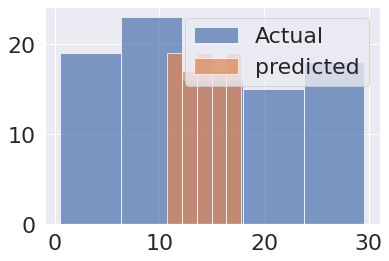

In [43]:
## Test data(Actual) and predicted data comparison.
plt.hist(y_test, bins = 5, label = "Actual", alpha = 0.7)
plt.hist(y_pred, bins = 5, label = "predicted", alpha = 0.7)

plt.legend()
plt.show()

Text(0, 0.5, 'y_pred')

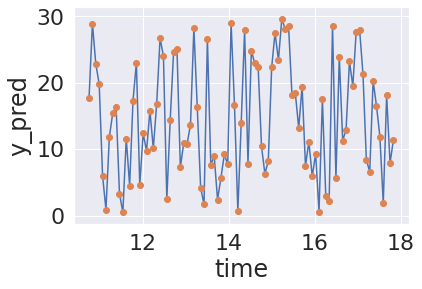

In [44]:
# ploting graph
error= sum(err)/err.size
plt.plot(y_pred, y_test)
 
plt.errorbar( y_pred,y_test,
             yerr = error,
             fmt ='o')
plt.xlabel('time')
plt.ylabel('y_pred')

Task 3: Approximate Bayesian Computation (ABC)
Using ‘rejection ABC’ method to compute the posterior distributions of the ‘selected’ regression model 
parameters in Task 2.

1) You only need to compute 2 parameter posterior distributions -- the 2 parameters with largest 
absolute valuesin your least squares estimation (Task 2.1) of the selected model. Fix all the other 
parameters in your model as constant, by using the estimated values from Task 2.1.

2) Use a Uniform distribution as prior, around the estimated parameter values for those 2 
parameters (from the Task 2.1). You will need to determine the range of the prior distribution.

3) Draw samples from the above Uniform prior, and perform rejection ABC for those 2 parameters.

4) Plot the joint and marginal posterior distribution for those 2 parameters.

5) Explain your results.


In [45]:
m_x4=data['x4'].mean()
m_x5=data['x5'].mean()
m_x32=data['X3_2'].mean()
print(m_x4,m_x5,m_x32)

1.4101214211262445 1.5955865070365443 2.2874846641192783


In [46]:
m_x4s=data['x4'].std()
m_x5s=data['x5'].std()
m_x32s=data['X3_2'].std()
print(m_x4s,m_x5s,m_x32s)

0.29039852538075117 0.3350019603661914 1.2804487880834328


In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.913
Date:                Mon, 25 Oct 2021   Prob (F-statistic):            0.00240
Time:                        11:17:20   Log-Likelihood:                -1070.6
No. Observations:                 301   AIC:                             2149.
Df Residuals:                     297   BIC:                             2164.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.8400      2.695      3.281      0.001       3.537      14.143
x4              -24.5754      7.972     -3.083      0.002     -40.264      -8.887
np.square(x3)     1.4997      0.467      3.213      0.001       0.581       2.418
x5               23.4295      6.973      3.360      0.001       9.706      37.153
==============================================================================
Omnibus:                      152.674   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.068
Skew:                           0.080   Prob(JB):                     0.000119
Kurtosis:                       1.811   Cond. No.                         73.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
def mod2(x4,x5,x32):
    return np.array([8.84-24.5754*x4+23.4295*x5+1.4997*x32])


m=mod2(data['x4'],data['x5'],data['X3_2'])

In [49]:
import pymc3 as pm
import theano.tensor as T

with pm.Model() as model:
    p1 = pm.Uniform('p', 0, 1)
    p2 = 1 - p1
    p = T.stack([p1, p2])
    assignment = pm.Categorical("assignment", p, 
                                shape=data.shape[0],
                                testval=np.random.randint(0, 2, data.shape[0]))
    
print("prior assignment, with p = %.2f:" % p1.tag.test_value)
print(assignment.tag.test_value[:10])



prior assignment, with p = 0.50:
[1 0 0 0 0 0 0 0 1 1]


In [50]:
with model:
    sds = pm.Uniform("sds", 0, 100, shape=2)
    centers = pm.Normal("centers", 
                        mu=np.array([data['x4'].mean(), data['x5'].mean()]), 
                        sd=np.array([data['x4'].std(), data['x5'].std()]), 
                        shape=2)
    
    center_i = pm.Deterministic('center_i', centers[assignment])
    sd_i = pm.Deterministic('sd_i', sds[assignment])
    
    # and to combine it with the observations:
    observations = pm.Normal("obs", mu=center_i, sd=sd_i, observed=data['x4'])
    
print("Random assignments: ", assignment.tag.test_value[:4], "...")
print("Assigned center: ", center_i.tag.test_value[:4], "...")
print("Assigned standard deviation: ", sd_i.tag.test_value[:4])

Random assignments:  [1 0 0 0] ...
Assigned center:  [1.59558651 1.41012142 1.41012142 1.41012142] ...
Assigned standard deviation:  [50. 50. 50. 50.]


In [51]:
with model:
    step1 = pm.Metropolis(vars=[p, sds, centers])
    step2 = pm.ElemwiseCategorical(vars=[assignment])
    trace = pm.sample(2000, step=(step1, step2))

Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [centers]
>>Metropolis: [sds]
>>Metropolis: [p]
>ElemwiseCategorical: [assignment]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 52 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


<Figure size 720x576 with 0 Axes>

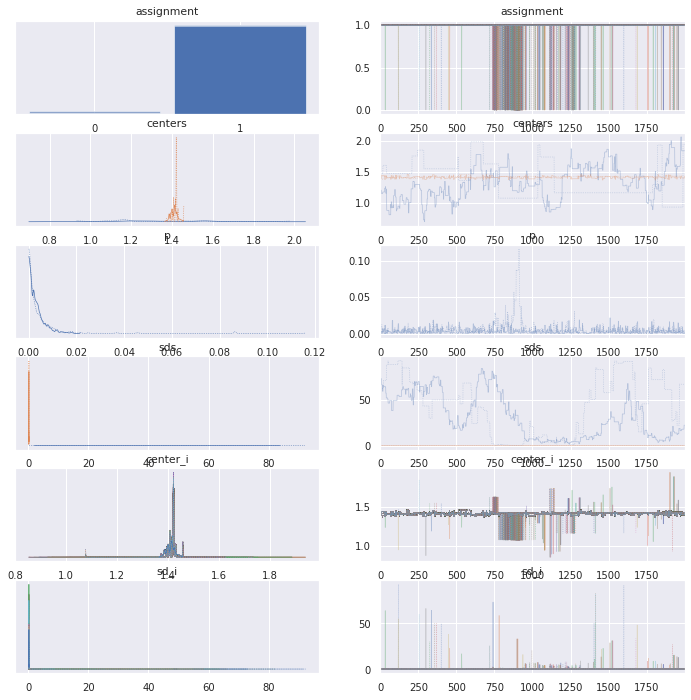

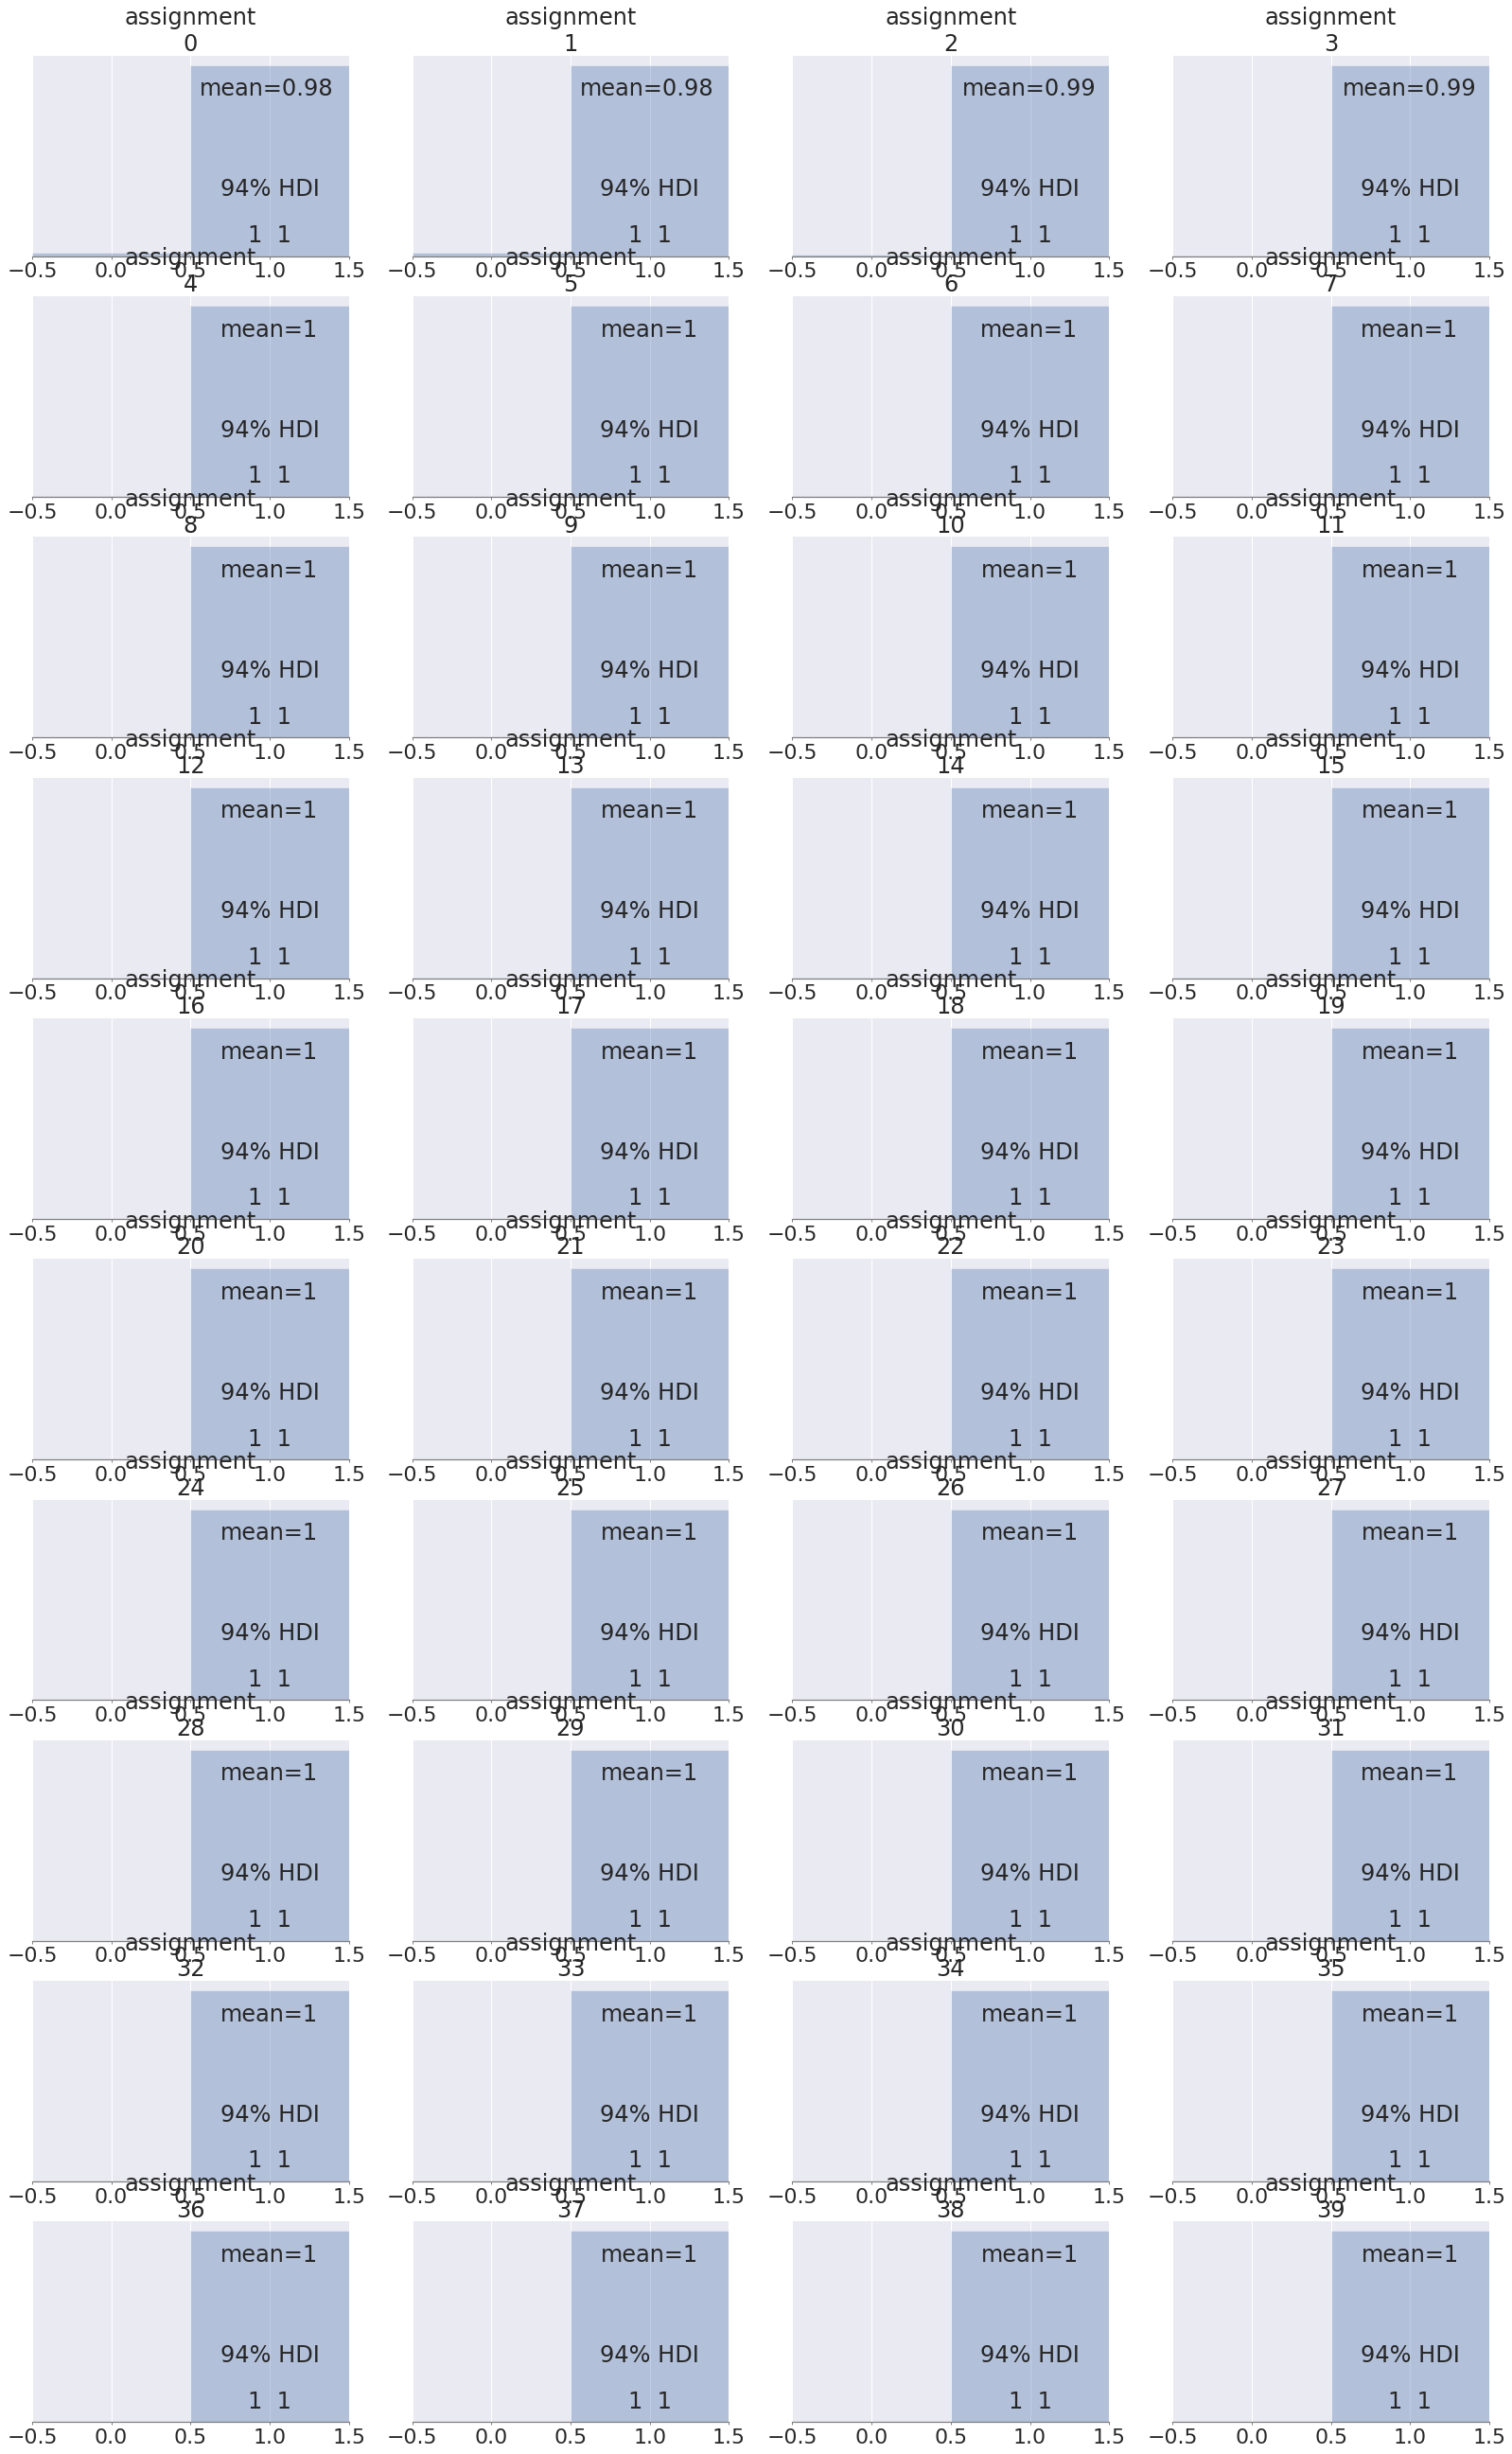

In [52]:
plt.figure(figsize=(10, 8))
pm.traceplot(trace)
pm.plot_posterior(trace)
plt.show()

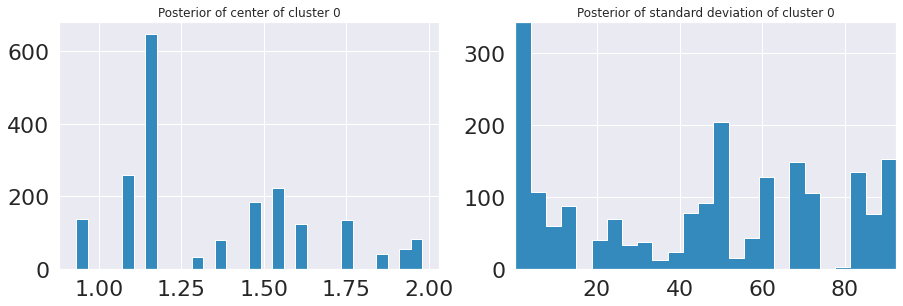

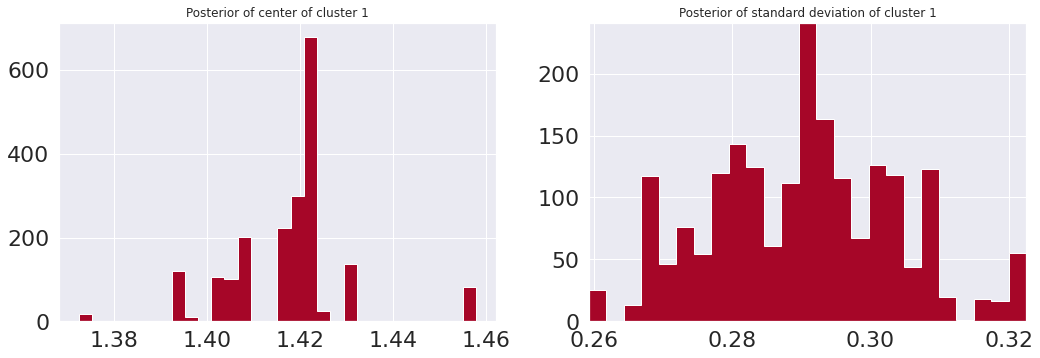

In [55]:
center_trace = trace["centers"][2000:]
std_trace = trace["sds"][2000:]
prev_std_trace = trace["sds"][:2000]

colors = ["#348ABD", "#A60628"] if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]
i_ = [1, 2, 3, 4]
for i in range(2):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, i_[2 * i])
    plt.title("Posterior of center of cluster %d" % i,fontsize=12)
    plt.hist(center_trace[:, i], color=colors[i], bins=30,
             histtype="stepfilled")

    plt.subplot(2, 2, i_[2 * i + 1])
    plt.title("Posterior of standard deviation of cluster %d" % i,fontsize=12)
    plt.hist(std_trace[:, i], color=colors[i], bins=25,
             histtype="stepfilled")
    plt.autoscale(tight=True)

plt.tight_layout()